# ***GOLD PRICES PREDICTION MODEL***


> AI PROJECT By ***Arpit Sagar[102003130]***



**Using Random Forest Regression(Supervised learning algorithm).**
>Operates by constructing several decision trees during training time and outputs mean of classes as prediction of all the trees.
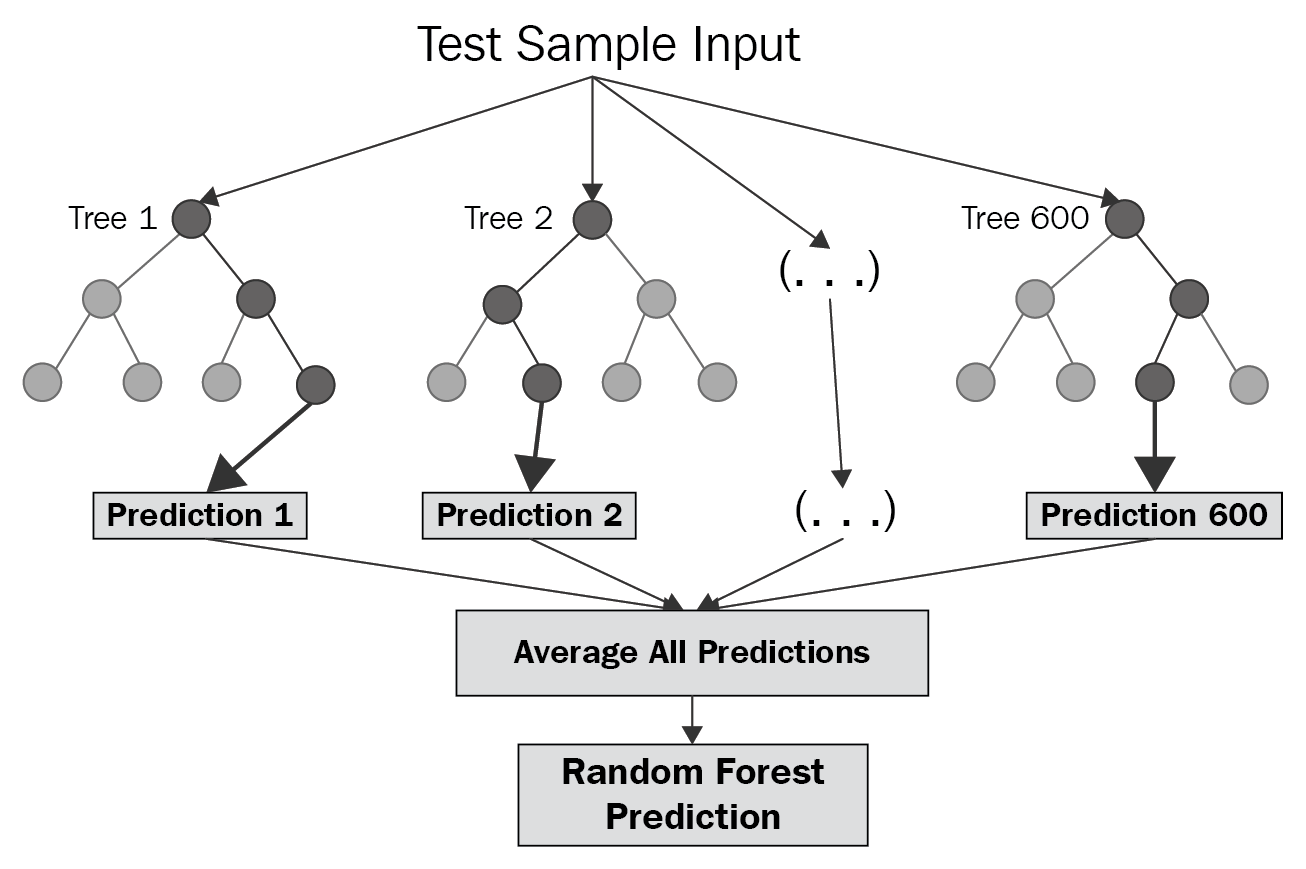








Importing all the necessary Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt  # matplotlib are used for plotting graphs
import seaborn as sns #making statistical graphics in Python


Data Collection and Processing

In [ ]:
#uploading dataset file
from google.colab import files
uploaded = files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
# print first 5 rows in the dataframe
gold_data.head()
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
print("type(gold_data)-->",type(gold_data))
print(gold_data)
# number of rows and columns
gold_data.shape
# getting some basic informations about the data
# DATA CLEANING
gold_data.info()

type(gold_data)--> <class 'pandas.core.frame.DataFrame'>
           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 

In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
 m# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**
1. Positive Correlation
2. Negative Correlation
**Positive Correlation:** Two features (variables) can be positively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) also increases.



**Negative Correlation:** Two features (variables) can be negatively correlated with each other. It means that when the value of one variable increase then the value of the other variable(s) decreases.



In [ ]:
correlation = gold_data.corr()

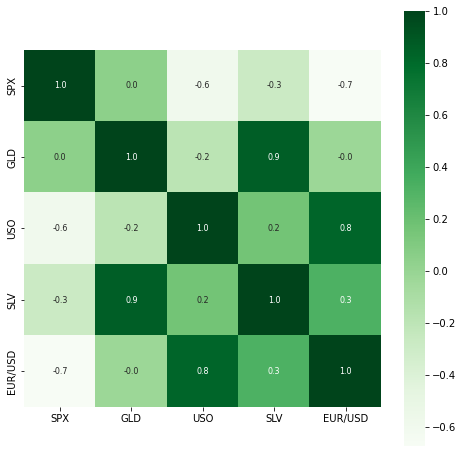

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


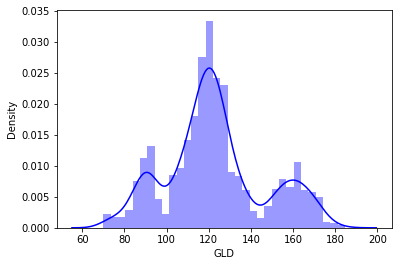

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='blue')

Splitting the Features and Target for training and testing

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
#X is the feature variable,containing all the features like SPX, USO, SLV, etc., on which the price of gold depends, excluding the GLD and Date column itself.
#Y is the target variable,the result we want to determine,i.e, the price of Gold. (It contains only the GLD column)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into Training data and Test Data**

X_train: contains a random set of values from variable ‘ X ‘

Y_train: contains the output (the price of Gold) of the corresponding value of X_train.

X_test: contains a random set of values from variable ‘ X ‘, excluding the ones from X_train( as they are already taken).

Y_train: contains the output (the price of Gold) of the corresponding value of X_test.
test_size: represents the ratio of how the data is distributed among X_trai and X_test (Here 0.2 means that the data will be segregated in the X_train and X_test variables in an 80:20 ratio). 



```
# This is formatted as code
```


from collections.abc import Iterable

from collections import defaultdict

import warnings

from itertools import chain, combinations

from math import ceil, floor

import numbers

from abc import ABCMeta, abstractmethod

from inspect import signature

import numpy as np

from scipy.special import comb

from object_detection.utils import indexable, check_random_state, _safe_indexing

**def train_test_split**

(
    *arrays,

    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
):

 n_arrays = len(arrays)
 if n_arrays == 0:
        raise ValueError("At least one array required as input")

 arrays = indexable(*arrays)

 n_samples = _num_samples(arrays[0])
 n_train, n_test = _validate_shuffle_split( n_samples, test_size, train_size, default_test_size=0.25 )

 if shuffle is False:
        if stratify is not None:
            raise ValueError("Stratified train/test split is not implemented for shuffle=False")

        train = np.arange(n_train)
        test = np.arange(n_train, n_train + n_test)

 else:
        if stratify is not None:
            CVClass = StratifiedShuffleSplit
        else:
            CVClass = ShuffleSplit

        cv = CVClass(test_size=n_test, train_size=n_train, random_state=random_state)

        train, test = next(cv.split(X=arrays[0], y=stratify))

 return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)#REGRESSOR IS THE NAME OF THE MODEL

In [ ]:
# training the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# **Model Evaluation**

# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):

	root = get_split(train, n_features)
	split(root, max_depth, min_size, n_features, 1)
	return root
# Make a prediction with a decision tree
def predict(node, row):

	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.69319992  81.86190002 115.7015001  127.59830049 120.77170078
 154.80519698 150.08059801 126.13310045 117.62779873 125.95760089
 116.71150101 171.85380051 141.72809792 167.67279858 115.02430018
 117.84790041 140.08870254 170.38110099 159.6882039  163.31119881
 155.12600016 125.06230026 175.85639965 157.66930376 125.17420034
  93.71590011  77.89109986 120.52409998 119.08819938 167.46249937
  88.23750089 125.13690034  91.34880068 117.73639982 121.09799875
 137.05260064 115.44520148 115.20380089 147.4108992  107.36840103
 104.6086024   87.12929793 126.5144007  117.89069998 153.95669925
 119.51630011 108.37559974 107.89049798  93.27720062 127.24429743
  74.87170027 113.66409907 121.16039982 111.17719932 119.00299899
 121.01089943 158.52090038 167.38660093 147.25089722  85.7872986
  94.27680062  86.83989899  90.45420037 119.11480075 126.40170055
 127.43480038 170.82289918 122.31369967 117.27999873  99.02909992
 168.93800115 143.31729821 132.38310234 121.1656025  121.17099962
 120.218900

**Calculating the R-Squared error from the predicted value:**

**def r2_score**
(y_true,y_pred,*,sample_weight=Nonemultioutput="uniform_average",force_finite=True, 
):

y_type, y_true, y_pred, multioutput = 

_check_reg_targets(y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)

    if _num_samples(y_pred) < 2:
        msg = "R^2 score is not well-defined with less than two samples."
        warnings.warn(msg, UndefinedMetricWarning)
        return float("nan")

    if sample_weight is not None:
        sample_weight = column_or_1d(sample_weight)
        weight = sample_weight[:, np.newaxis]
    else:
        weight = 1.0

    numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    denominator = (
        weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
    ).sum(axis=0, dtype=np.float64)

    return _assemble_r2_explained_variance(
        numerator=numerator,
        denominator=denominator,
        n_outputs=y_true.shape[1],
        multioutput=multioutput,
        force_finite=force_finite,
    )

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):

	correct = 0
  
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R SQUARED ERROR IS : ", error_score)
#here it comes out to be 98.9 per cent accuracy

R SQUARED ERROR IS :  0.9898940153752216


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)#Converting the values of Y_test into a list.

## **Plotting** **values of actual prices, versus the predicted prices to know, closeness of our predictions to the actual prices :**

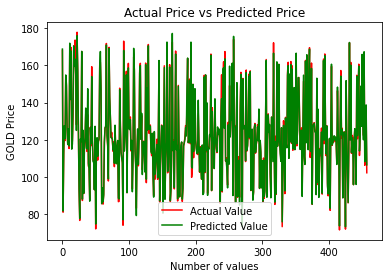

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()

**Conclusion :** 
As in this project, we first train a machine learning model, then use the trained model for prediction and we can see the accuracy through the plotted graph wherein the observation shows actual prices and predicted prices almost overlap each other... 